# Imports and Custom Functions writen for convenience

## Importing Libraries

In [1]:
from rank_bm25 import BM25Okapi, BM25Plus, BM25L
from BM25_2 import BM25
from newap import average_precision, MAP
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Custom Functions and Location of data folder

In [2]:
loc = "../refining_seriously/"
def namestr(obj, namespace = globals()):
	return [name for name in namespace if namespace[name] is obj][0]
def print_json(query, n = 3, m = 5, k=6):
	n = 3
	print(f"{namestr(query)} = "+"{\n", end="")  # start of the json
	l = sorted(list(query.keys()),
			key=lambda x: int(x[k:]))
	for QID in l[:n]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	for i in range(2): print("\t...")
	for QID in l[-n:]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	print("}")  # end of the json

## Importing Data

In [3]:
# "cases.json" has the query and the doc_id of the relevant documents
with open(loc+"cases.json") as f:
    prior_cases = json.load(f)
print_json(prior_cases, k=1)

prior_cases = {
	"C1": ['masud', 'khan', 'v', 'state', 'uttar', ......],
	"C2": ['indian', 'oil', 'corpor', 'v', 'nepc', ......],
	"C3": ['gurpal', 'singh', 'v', 'state', 'punjab', ......],
	...
	...
	"C2912": ['dharangadhara', 'chemic', 'work', 'limit', 'v', ......],
	"C2913": ['central', 'bank', 'india', 'v', 'sethumadhavan', ......],
	"C2914": ['som', 'raj', 'soma', 'v', 'state', ......],
}


In [4]:
# "Query_doc.json" has all the queries (X)
with open(loc+"Query_doc.json") as f:
    query = json.load(f)
print_json(query)

query = {
	"AILA_Q1": ['appel', 'februari', 'appoint', 'offic', 'grade', ......],
	"AILA_Q2": ['appel', 'us', 'examin', 'prime', 'wit', ......],
	"AILA_Q3": ['appeal', 'aris', 'judgment', 'learn', 'singl', ......],
	...
	...
	"AILA_Q48": ['whether', 'sanction', 'requir', 'initi', 'crimin', ......],
	"AILA_Q49": ['appel', 'patwari', 'work', 'villag', 'v1', ......],
	"AILA_Q50": ['peculiar', 'featur', 'appeal', 'special', 'leav', ......],
}


In [5]:
# "answers.json" has the relevant documents (Y)
with open(loc+"answers.json") as f:
    answers = json.load(f)
print_json(answers, 3, 1)

answers = {
	"AILA_Q1": ['C14', ......],
	"AILA_Q2": ['C27', ......],
	"AILA_Q3": ['C1', ......],
	...
	...
	"AILA_Q48": ['C82', ......],
	"AILA_Q49": ['C174', ......],
	"AILA_Q50": ['C27', ......],
}


# Main Part

In [7]:
model = BM25(prior_cases, query)

Loading from cache...


In [30]:
X = {x:None for x in np.arange(0.1, 10, 0.25)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######

    print("k2 =", var, end=" ")
    
    scores = model.get_scores(k2 = var).tolist()  # k1=0.25, k2=1.2, b=0.75
    
    MeanAP = MAP(scores, answers)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)

    # show results 
    t1 = time.time() ######
    # print(f"took {(t1-t0)} seconds") ######
    # print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    # print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min\n") ######
    # print(f"total elapsed time = {(t1-t00)} seconds\n") ######

k2 = 0.1 -> MeanAP = 0.43323209513224625
estimated time remaining = 121.61098337173462 sec = 2.0268497228622437 min
k2 = 0.35 -> MeanAP = 0.42992906353170374
estimated time remaining = 116.51661992073059 sec = 1.9419436653455098 min
k2 = 0.6 -> MeanAP = 0.42813225011314116
estimated time remaining = 114.57283473014832 sec = 1.909547245502472 min
k2 = 0.8499999999999999 -> MeanAP = 0.4279622737317019
estimated time remaining = 112.26533246040344 sec = 1.8710888743400573 min
k2 = 1.0999999999999999 -> MeanAP = 0.4294349198015192
estimated time remaining = 108.19302535057068 sec = 1.803217089176178 min
k2 = 1.3499999999999999 -> MeanAP = 0.42857712888368676
estimated time remaining = 105.70817542076111 sec = 1.7618029236793518 min
k2 = 1.5999999999999999 -> MeanAP = 0.43254798564166463
estimated time remaining = 102.859212909426 sec = 1.7143202151571002 min
k2 = 1.8499999999999999 -> MeanAP = 0.433529444255446
estimated time remaining = 98.93134117126465 sec = 1.6488556861877441 min
k2 = 

In [31]:
a = list(X.keys())
m = max(X.values())
print(f"best BM25(b = {a[list(X.values()).index(m)]}) = {m*100}%")

best BM25(b = 2.8499999999999996) = 43.48895958250722%


Text(0, 0.5, 'MAP')

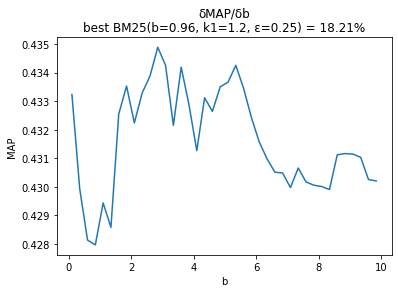

In [32]:
plt.plot(list(X.keys())[:], list(X.values())[:])
plt.title("δMAP/δb\nbest BM25(b=0.96, k1=1.2, ε=0.25) = 18.21%")
plt.xlabel("b")
plt.ylabel("MAP")